In [3]:
import json
import matplotlib.pyplot as plt
from itertools import combinations
from scipy import stats
import numpy as np

datafile = "candidates_eirik.json"

with open(datafile) as f:
    data = json.load(f)

# Number of tracks found
print("Number of tracks: {}".format(len(data.keys())))

Number of tracks: 264


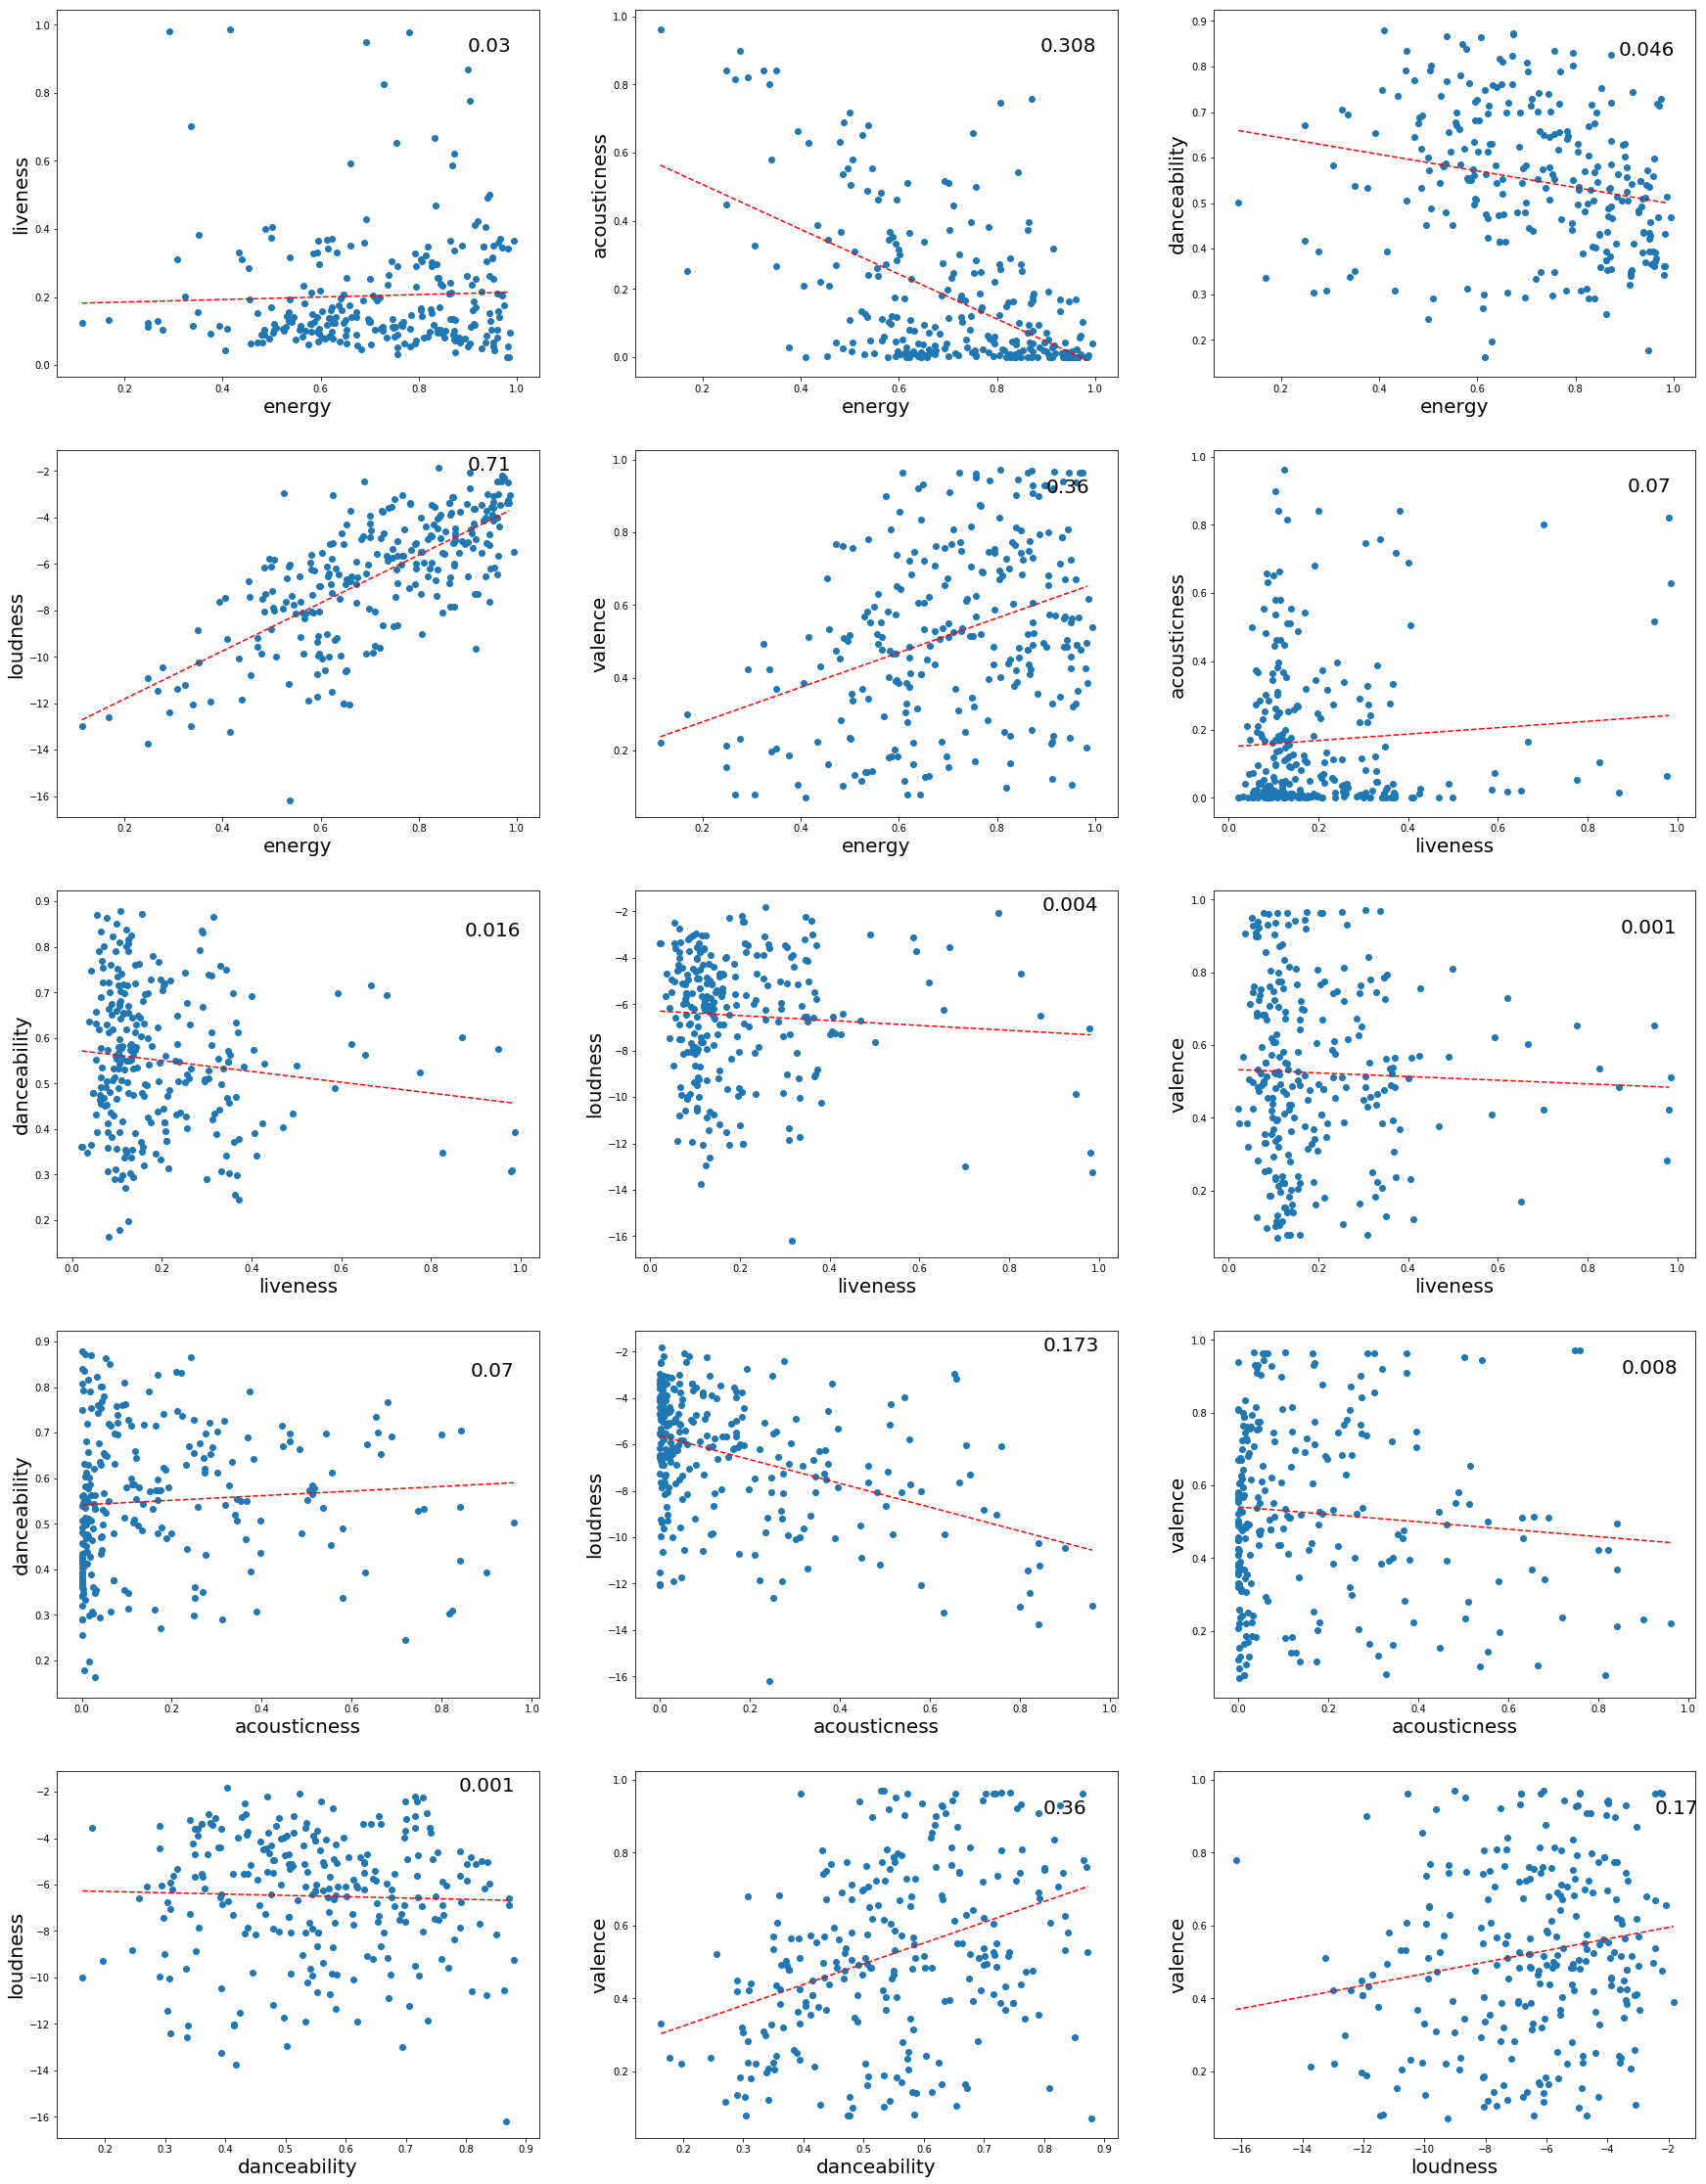

In [4]:
# Make plottable data structure, omitting the tempo and mode (not continuous)

names = ["danceability", "energy", "acousticness", "liveness", "loudness", "valence"]
features = {}
for name in names:
    features[name] = {}
    features[name]["data"] = [data[i][name] for i in data.keys()]
    features[name]["id"] = name
    
pairs = combinations(features.keys(), 2)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(30, 40))
for pair, ax in zip(pairs, fig.axes):
    x = pair[0]
    y = pair[1]
    
    # Linear regression
    slope, intercept, r, pval, stderr = stats.linregress(features[x]["data"], features[y]["data"])
    regress_x = np.arange(min(features[x]["data"]), max(features[x]["data"]), 0.01)
    regress_y = [slope * i + intercept for i in regress_x]
    
    # Text placement coordinates
    text_x = max(features[x]["data"])*0.95
    text_y = max(features[y]["data"])*0.95
    
    # Make plots
    ax.scatter(features[x]["data"], features[y]["data"])
    ax.plot(regress_x, regress_y, color="red", linestyle="--")
    
    ax.text(text_x, text_y, str(r)[:4] if "-" not in str(r) else str(r**2)[:5], ha="center", va="center", fontsize=20)
    
    ax.set_xlabel(features[x]["id"], fontsize=20)
    ax.set_ylabel(features[y]["id"], fontsize=20)